In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
a = np.load("./pose.npy",allow_pickle=True)

In [65]:
a.sum()

670650.0

In [67]:
import torch

In [81]:
def generate_planes():
    """
    Defines planes by the three vectors that form the "axes" of the
    plane. Should work with arbitrary number of planes and planes of
    arbitrary orientation.
    """
    return torch.tensor([[[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]],
                            [[1, 0, 0],
                            [0, 0, 1],
                            [0, 1, 0]],
                            [[0, 0, 1],
                            [1, 0, 0],
                            [0, 1, 0]]], dtype=torch.float32)
def generate_plane():
    """
    Defines planes by the three vectors that form the "axes" of the
    plane. Should work with arbitrary number of planes and planes of
    arbitrary orientation.
    """
    return torch.tensor([[[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]]], dtype=torch.float32)
def project_onto_planes(planes, coordinates):
    """
    Does a projection of a 3D point onto a batch of 2D planes,
    returning 2D plane coordinates.

    Takes plane axes of shape n_planes, 3, 3
    # Takes coordinates of shape N, M, 3
    # returns projections of shape N*n_planes, M, 2
    """
    N, M, C = coordinates.shape
    n_planes, _, _ = planes.shape
    coordinates = coordinates.unsqueeze(1).expand(-1, n_planes, -1, -1).reshape(N*n_planes, M, 3).to(torch.float32)
    inv_planes = torch.linalg.inv(planes).unsqueeze(0).expand(N, -1, -1, -1).reshape(N*n_planes, 3, 3)
    
    projections = torch.bmm(coordinates, inv_planes)
    return projections[..., :2]
def project_onto_planes(planes, coordinates):
    """
    Does a projection of a 3D point onto a batch of 2D planes,
    returning 2D plane coordinates.

    Takes plane axes of shape n_planes, 3, 3
    # Takes coordinates of shape N, M, 3
    # returns projections of shape N*n_planes, M, 2
    """
    N, M, C = coordinates.shape
    n_planes, _, _ = planes.shape
    
    coordinates = coordinates.unsqueeze(1).expand(-1, n_planes, -1, -1).reshape(N*n_planes, M, 3).to(torch.float32)
    inv_planes = torch.linalg.inv(planes).unsqueeze(0).expand(N, -1, -1, -1).reshape(N*n_planes, 3, 3)
    
    projections = torch.bmm(coordinates, inv_planes)
    return projections[..., :2]

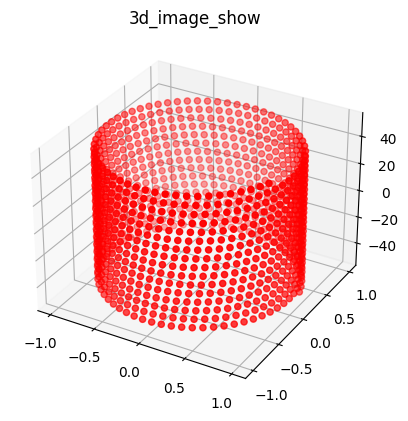

In [90]:
#ax = plt.axes(projection='3d')  # 设置三维图形模式
z = np.arange(-50, 50, 0.1)	 # z坐标范围-50~50
x = np.cos(z)
y = np.sin(z)
ddd_points = np.zeros((1,1000,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

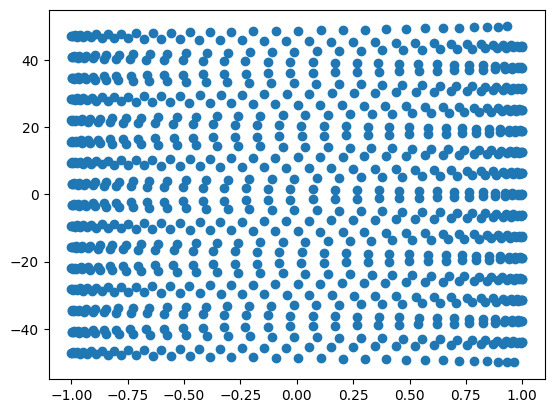

In [94]:
plane_axe = generate_plane()
points = project_onto_planes(plane_axes, torch.from_numpy(ddd_points))
plt.scatter(points[:,:,1],points[:,:,0])

In [84]:
plane_axes = generate_plane()
coord = torch.randn(1,50,3)
points = project_onto_planes(plane_axes, coord)

In [80]:
plane_axes.shape

torch.Size([3, 3, 3])

In [78]:
points.shape

torch.Size([3, 50, 2])

Text(0.5, 0, 'Z')

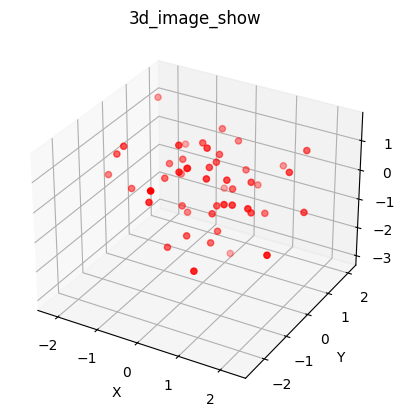

In [85]:

x = np.array(coord[:,:,0])
y = np.array(coord[:,:,1])
z = np.array(coord[:,:,2])
 
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
 
ax.set_xlabel('X')  # 设置x坐标轴
ax.set_ylabel('Y')  # 设置y坐标轴
ax.set_zlabel('Z')  # 设置z坐标轴
 


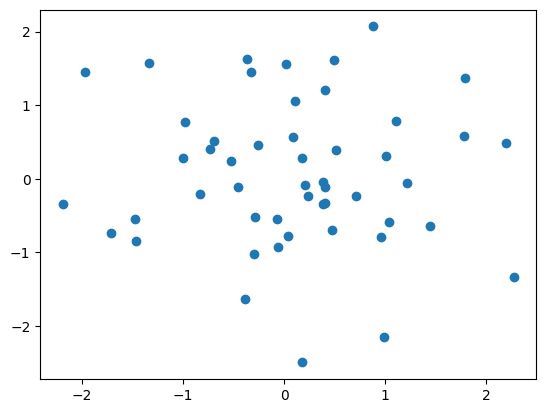

In [86]:
plt.scatter(points[:,:,0], points[:,:,1])

In [72]:
coord

tensor([[[ 0.1480,  1.3784,  0.2333],
         [ 1.2321, -0.2493, -1.7577],
         [-0.0865, -0.7858,  2.4096],
         [ 1.2736, -0.1025, -0.8724],
         [-0.2339, -0.3707, -2.0286],
         [-1.3821, -0.7582,  0.0879],
         [ 0.0640,  0.8188,  0.4287],
         [ 0.7609,  0.5321, -0.0586],
         [ 0.7652,  1.2619,  0.0914],
         [-0.9121, -1.5517, -0.3299],
         [ 0.3252, -0.7364, -1.3896],
         [-0.3565, -0.4040,  0.2755],
         [ 0.2082, -0.5212,  1.0914],
         [-0.6214, -0.3161,  1.1134],
         [ 0.0618,  1.1982, -0.4240],
         [ 0.7422, -0.9875, -0.2665],
         [ 0.6172,  0.3984, -1.1288],
         [-0.1210,  0.6849, -0.2815],
         [ 1.7149,  0.2302, -0.9917],
         [ 0.0475,  0.5393,  0.5941],
         [ 0.4495, -0.9781,  0.1437],
         [-1.7560, -1.0481,  0.6952],
         [-1.6339,  0.2314,  1.7405],
         [-0.8553, -0.7853,  0.1965],
         [-0.5327, -0.3773,  0.3648],
         [ 1.0375,  1.4712, -0.1527],
         [ 1

In [71]:
points

tensor([[[ 0.1480,  1.3784],
         [ 1.2321, -0.2493],
         [-0.0865, -0.7858],
         [ 1.2736, -0.1025],
         [-0.2339, -0.3707],
         [-1.3821, -0.7582],
         [ 0.0640,  0.8188],
         [ 0.7609,  0.5321],
         [ 0.7652,  1.2619],
         [-0.9121, -1.5517],
         [ 0.3252, -0.7364],
         [-0.3565, -0.4040],
         [ 0.2082, -0.5212],
         [-0.6214, -0.3161],
         [ 0.0618,  1.1982],
         [ 0.7422, -0.9875],
         [ 0.6172,  0.3984],
         [-0.1210,  0.6849],
         [ 1.7149,  0.2302],
         [ 0.0475,  0.5393],
         [ 0.4495, -0.9781],
         [-1.7560, -1.0481],
         [-1.6339,  0.2314],
         [-0.8553, -0.7853],
         [-0.5327, -0.3773],
         [ 1.0375,  1.4712],
         [ 1.3431,  0.5841],
         [-0.9626,  1.0402],
         [-0.7881, -0.9040],
         [ 1.9696, -0.2537],
         [ 0.6850, -0.0844],
         [-0.0268, -1.9586],
         [-0.8484,  2.0046],
         [-1.3130, -1.2521],
         [-2.0

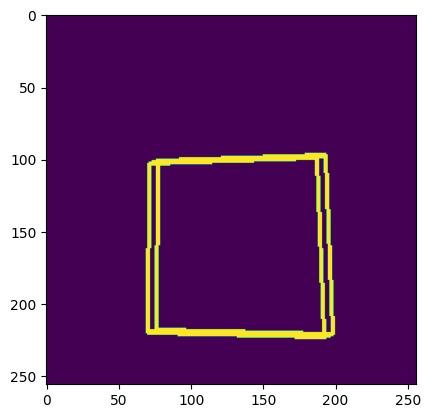

In [66]:
plt.imshow(a)

In [48]:
deformed = np.load("./deformed.npy")
deformation = np.load("./deformation.npy")
mask = np.load("./mask.npy")
occ_map = np.load("./occlusion_map.npy")
sparse_map = np.load("./sparse_deformed.npy")
#jacbi = np.load("./jacobian.npy")
prediction = np.load("./prediction.npy")

(1, 3, 256, 256)


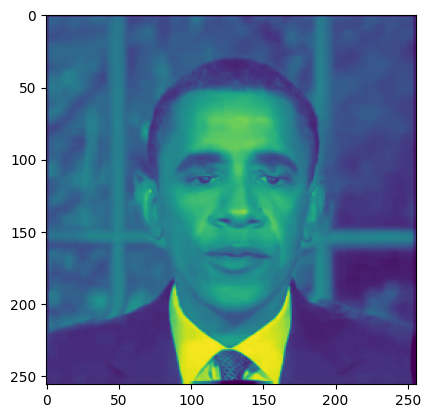

In [54]:
print(deformed.shape)
plt.imshow(deformed[0,0])

上图经过

(1, 3, 256, 256)


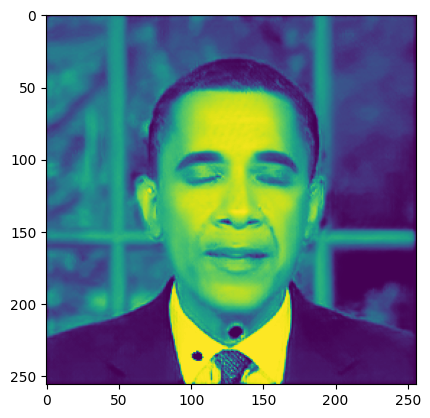

In [52]:
print(prediction.shape)
plt.imshow(prediction[0,0])

(1, 11, 3, 64, 64)


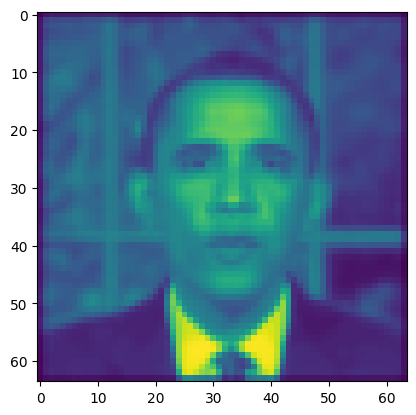

In [47]:
print(sparse_map.shape)
plt.imshow(sparse_map[0,0,0])

(1, 1, 64, 64)


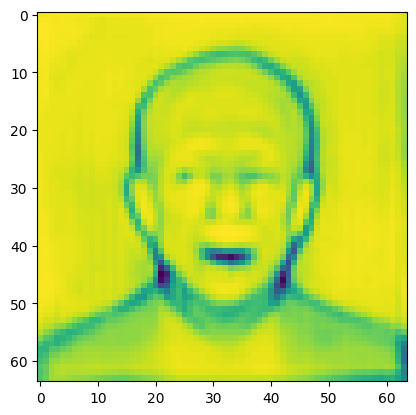

In [42]:
print(occ_map.shape)
plt.imshow(occ_map[0,0])

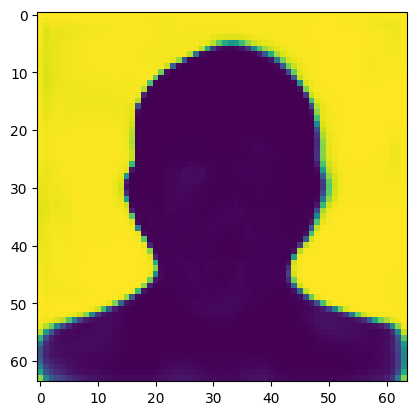

In [37]:
plt.imshow(mask[0,0])

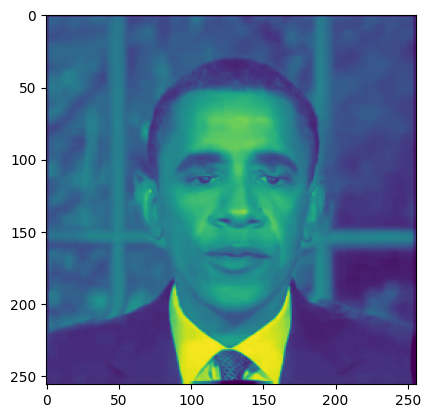

In [28]:
plt.imshow(a[0,0])

TypeError: Invalid shape (64, 64, 2) for image data

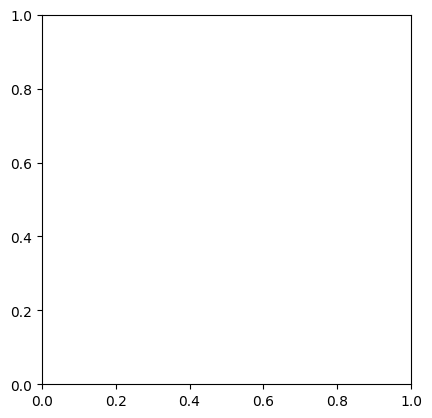

In [44]:
plt.imshow(b[0,:,:,])